## week-03------------->

###### Granovetter's Strength of Weak ties:-

###### Triads, clustering coefficient and neighborhood overlap:-

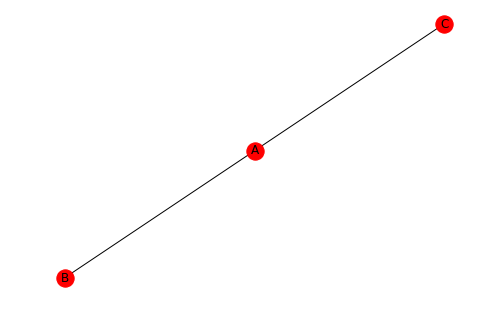

In [8]:
#here A is friend with B n C. but B n C don't know each other.

#This is called Triad.


import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_nodes_from(["A","B","C"])
G.add_edges_from([("A","B"),("A","C")])
nx.draw(G,with_labels=1)

#Eventually B n C become friend.

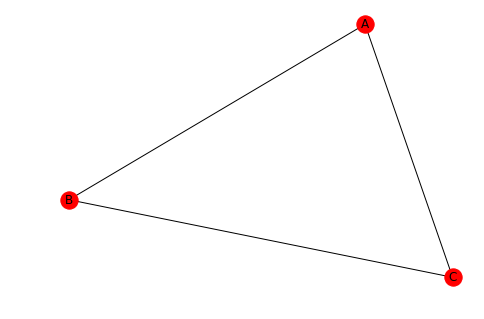

In [13]:
#if B n C becomes friend then it is called TRIADIC CLOSURE.
G.add_edge("B","C")
nx.draw(G,with_labels=1)

###### Clustering coefficient:-

* it is basically the strength of the friendship.

* =total no. of friendship between my friends/total no. of posssible friendship b/w them.

*example:-

    * I have 5 friends so total no. of possible friendship b/w them is =(5*4)/2
    
    * I have 5 friends n they don't know each other. then clustering coefficient for this is:=0/10=0
    
    * I have 5 friends n they know each other. then clustering coefficient for this is:=10/10=0

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 5
Average degree:   1.6667


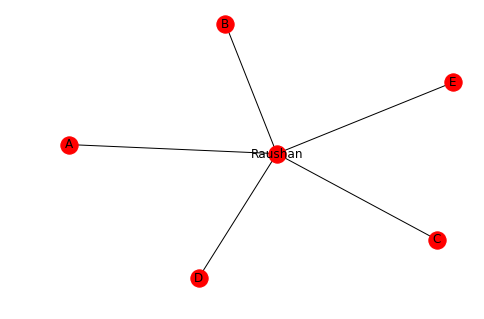

clustering coefficient:- {'Raushan': 0, 'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0}


In [49]:
# scenerio 1:-I have 5 friends n they don't know each other.
# then clustering coefficient for this is:=0/10=0


import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
node_list=["Raushan","A","B","C","D","E"]
G.add_nodes_from(node_list)
edge_list=[("Raushan",i) for i in node_list if i!="Raushan"]
G.add_edges_from(edge_list)
print(nx.info(G))
nx.draw(G,with_labels=1)
plt.show()

print("clustering coefficient:-",nx.clustering(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000


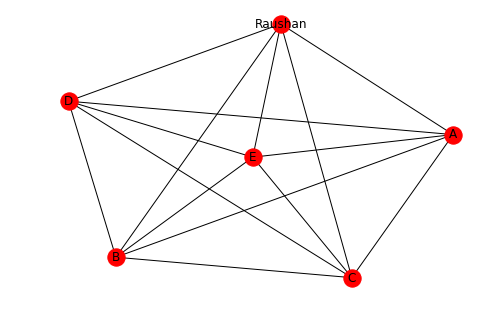

clustering coefficient:- {'Raushan': 1.0, 'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 1.0}


In [50]:
# scenerio 2:-I have 5 friends n they know each other.
# then clustering coefficient for this is:=10/10=1


import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
node_list=["Raushan","A","B","C","D","E"]
G.add_nodes_from(node_list)
edge_list=[(i,j) for i in node_list for j in node_list if i!=j]
G.add_edges_from(edge_list)
print(nx.info(G))
nx.draw(G,with_labels=1)
plt.show()

print("clustering coefficient:-",nx.clustering(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 12
Average degree:   4.0000


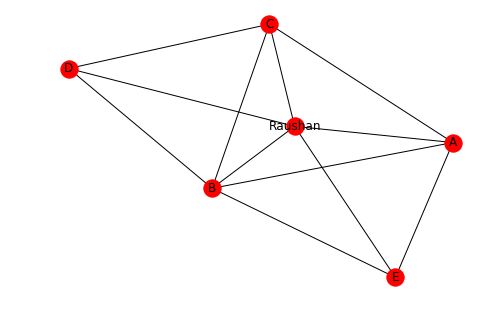

clustering coefficient:- {'Raushan': 0.7, 'A': 0.8333333333333334, 'B': 0.7, 'C': 0.8333333333333334, 'D': 1.0, 'E': 1.0}


In [59]:
#scenerio 3:clustering coefficient-it can be inbetween 0 and 1

import networkx as nx
import matplotlib.pyplot as plt
import random

def add_edge(node_list):
    edge_list=[]
    for i in node_list:
        for j in node_list:
            if(i==j):
                continue
            elif(i=="Raushan"):
                edge_list.append((i,j))
            else:
                c=random.choice([0,0,1,0,1])
                if(c==1):
                    edge_list.append((i,j))
    return(edge_list)

G=nx.Graph()
node_list=["Raushan","A","B","C","D","E"]
G.add_nodes_from(node_list)
edge_list=add_edge(node_list)
G.add_edges_from(edge_list)
print(nx.info(G))
nx.draw(G,with_labels=1)
plt.show()

print("clustering coefficient:-",nx.clustering(G))

#here clustering coefficient for raushan is shown

###### Neighbourhood overlap:-
    * =common friends/total friends

###### Local Bridge:-
    * if A n B have not any mutual friend. and A and B have another group of friends.it is a weak tie.

###### Strong Triadic Closure Property:-
    * A and B strong ties and A and C are strong ties. B and C have more possibly the friend.

* Neighbourhood overlap------>0----------->1 as the value goes to 0 to 1 then chances of local bridge decreases.

###### Embedednesss:-
    * =no.of common friends
    * embededness high then strong relationship.

###### Structural holes:-
    * 

##### Strong and weak ralatiionship....finding communities in a graph(BRUTE FORCE MODEL)

In [67]:
import itertools
for i in itertools.combinations([1,2,3,4],2):
    print(i)

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [68]:
import itertools
for i in itertools.combinations([1,2,3,4],3):
    print(i)

(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


In [105]:
n=4;f=[];s=[]
nodes=[1,2,3,4]
for i in range(1,n//2+1):
    comb=[list(x) for x in itertools.combinations(nodes,i)]
    f.extend(comb)
print(f)

for i in range(len(f)):
    l=list(set(nodes)-set(f[i]))
    s.append(l)
print(s)

[[1], [2], [3], [4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]
[[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3], [3, 4], [2, 4], [2, 3], [1, 4], [1, 3], [1, 2]]


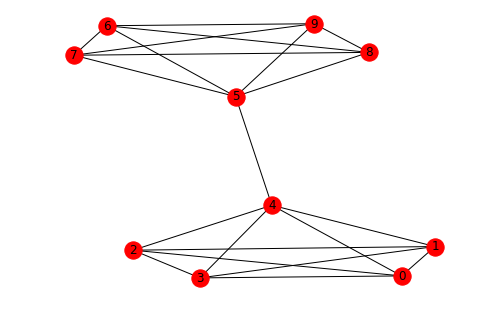

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.barbell_graph(5,0)
nx.draw(G,with_labels=1)
plt.show()

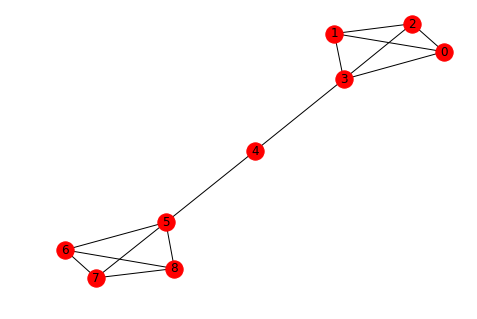

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.barbell_graph(4,1)
nx.draw(G,with_labels=1)
plt.show()

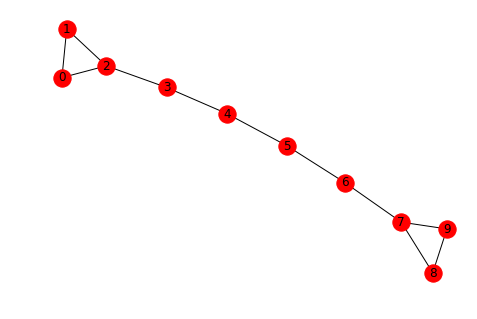

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.barbell_graph(3,4)
nx.draw(G,with_labels=1)
plt.show()

([0, 1, 2, 3, 4]),([5, 6, 7, 8, 9])


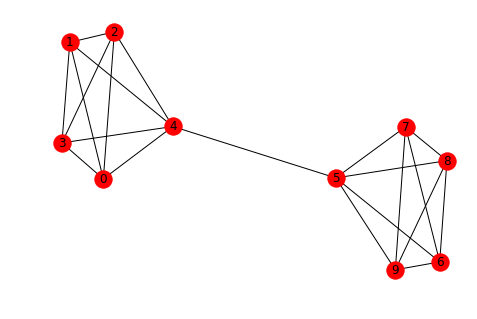

In [121]:
import networkx as nx
import itertools


def communities_brute(G):
    nodes=G.nodes()
    n=G.number_of_nodes()
    
    first_community=[]
    for i in range(1,n//2+1):
        comb=[list(x) for x in itertools.combinations(nodes,i)]
        first_community.extend(comb)
    
    second_community=[]
    for i in range(len(first_community)):
        l=list(set(nodes)-set(first_community[i]))
        second_community.append(l)
    
    #which division is the best?
    num_intra_edges1=[]
    num_intra_edges2=[]
    num_inter_edges=[]
    ratio=[]          #ratio of no. of intra/no. of inter community edges
    
    for i in range(len(first_community)):
        num_intra_edges1.append(G.subgraph(first_community[i]).number_of_edges())
        
    for i in range(len(second_community)):
        num_intra_edges2.append(G.subgraph(second_community[i]).number_of_edges())
        
    e=G.number_of_edges()
    
    for i in range(len(first_community)):
        num_inter_edges.append(e-num_intra_edges1[i]-num_intra_edges2[i])
        
    #find the ratio
    for i in range(len(first_community)):
        ratio.append(float((num_intra_edges1[i] + num_intra_edges2[i]) / num_inter_edges[i]))
        
    max_value = max(ratio)
    max_index = ratio.index(max_value)
    
    print("({}),({})".format(first_community[max_index],second_community[max_index]))
    

G=nx.barbell_graph(5,0)
communities_brute(G)
nx.draw(G,with_labels=1)
plt.show()

###### Community Detection Using Girvan Newman Algorithm:-

In [123]:
#it is the more feasible algorithm

import networkx as nx



